In [1]:
# Import Libraries
import numpy as np
import rasterio
import scipy
from scipy import ndimage
import os
from rasterio.plot import show
import matplotlib.pyplot as plt


In [2]:
class fillNA:
    def __init__(self, img):
        self.img = img

    def beforeFill(self):
        src = rasterio.open(self.img)
        ras = src.read(1)
        show(ras)
        src.close()

    @staticmethod
    def convolve_mapping(x):
        if np.isnan(x[4]) and not np.isnan(np.delete(x, 4)).all():
            return np.nanmedian(np.delete(x, 4))
        else:
            return x[4]

    def afterFill(self):
        img = rasterio.open(self.img)
        ras = img.read(1)
        tmp_img = ras.copy()
        window_1 = ndimage.generic_filter(
            tmp_img, function=self.convolve_mapping, footprint=np.ones((3, 3)), mode='nearest')
        while True:
            window_1 = ndimage.generic_filter(
                window_1, function=self.convolve_mapping, footprint=np.ones((3, 3)), mode='nearest')
            if ~np.any(np.isnan(window_1) == True):
                break
        return show(window_1)


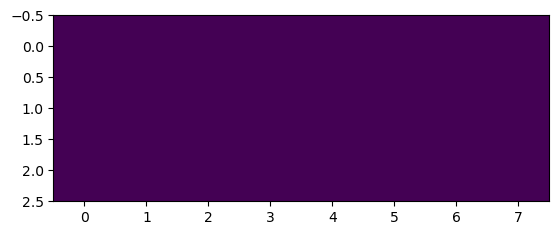

<AxesSubplot: >

In [3]:
foo_arr = fillNA('E:/Workspace/Fill_NA/data/sample_tif.tif')
foo_arr.fillArr()